Downloading Dataset

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2


In [15]:
!cp -r /root/.cache/kagglehub/datasets/sartajbhuvaji .

In [16]:
!ls sartajbhuvaji

brain-tumor-classification-mri


Importing Dependencies

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [18]:
import ipywidgets as widgets
import os
import io
import numpy as np
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Folder Path

In [19]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [20]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(5740, 150, 150, 3)

Train_Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [22]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [23]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,184,388 (15.96 MB)

 Trainable params: 4,184,388 (15.96 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs = 5, validation_split=0.1)

Epoch 1/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 970s 7s/step - accuracy: 0.2635 - loss: 4.6729 - val_accuracy: 0.2785 - val_loss: 1.3247
Epoch 2/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 957s 6s/step - accuracy: 0.4052 - loss: 1.2748 - val_accuracy: 0.5087 - val_loss: 1.0747
Epoch 3/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 981s 6s/step - accuracy: 0.6132 - loss: 0.9199 - val_accuracy: 0.5010 - val_loss: 1.0692
Epoch 4/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 978s 6s/step - accuracy: 0.6992 - loss: 0.7216 - val_accuracy: 0.6809 - val_loss: 0.7717
Epoch 5/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 979s 6s/step - accuracy: 0.7741 - loss: 0.5686 - val_accuracy: 0.5513 - val_loss: 1.2057


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

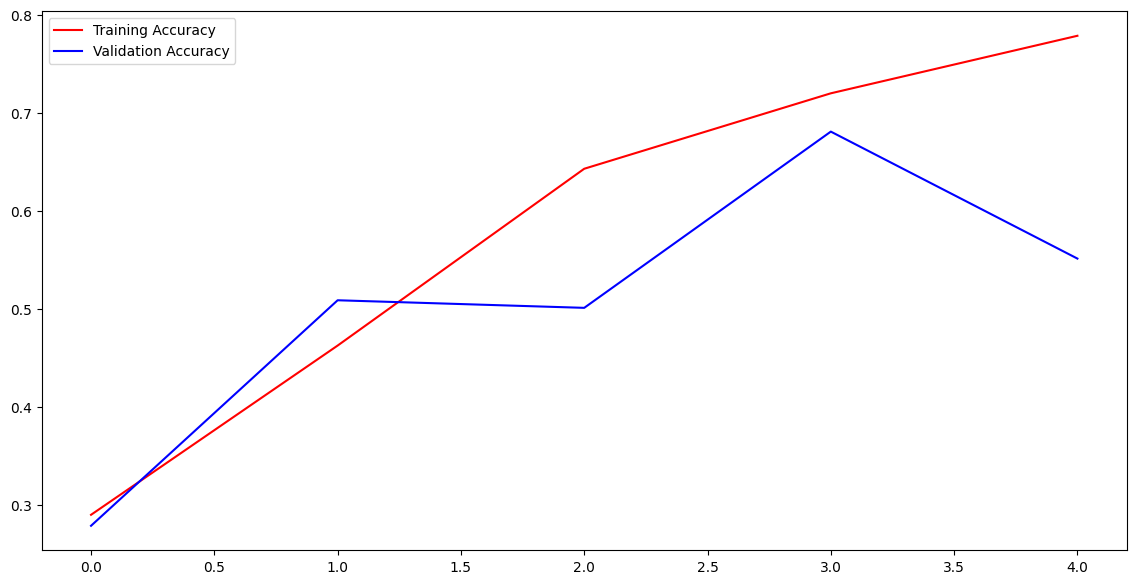

In [28]:
model.save('braintumor.h5')
acc = history.history['accuracy']
epochs = range(len(acc))
val_acc = history.history['val_accuracy']
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

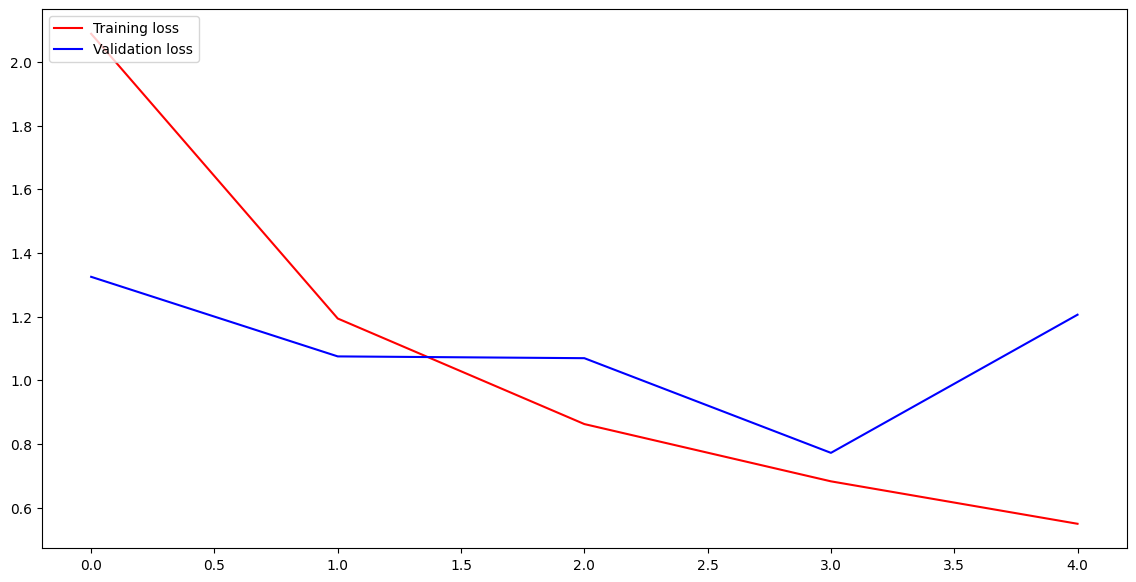

In [29]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [43]:
img = cv2.imread('/content/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/glioma_tumor/gg (1).jpg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape


(150, 150, 3)

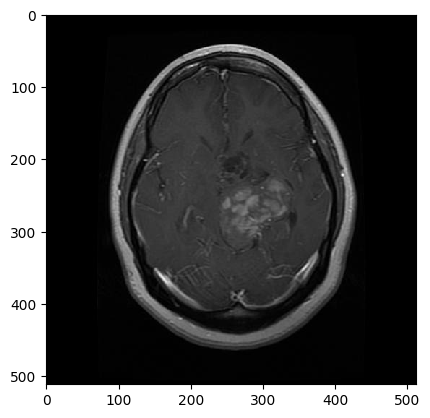

In [44]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training/glioma_tumor/gg (1).jpg')
plt.imshow(img,interpolation = 'nearest')
plt.show()

In [45]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Assuming `img` is the original input image
img_resized = img.resize((150, 150))  # Resize to expected dimensions if needed
img_array = img_to_array(img_resized)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

a = model.predict(img_array)
indices = a.argmax()
indices


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


0